# The Search for Life and Habitable Exoplanets
### CMPS530 | Final Project | Robert Biebrich | 2023

## Introduction:
One of the most astounding examples of scientific progress in the last century has been the discovery and successive rapid catalogging of inumerable planets outside our solar system. These planets, called extrasolar planets or exoplanets for short, are alien worlds foreign to us in just about every way imaginable. They orbit distant stars which they call their sun or suns, as many of the systems contain more than one star! Many of them formed in a rather different neighborhood of the galaxy than our own and may hold new and remarkable insights into the nature of the universe we share.

Finding and studying exoplanets can serve two main enterprises, both of which speak to some of the biggest questions we have as a species: First, are we alone in the universe or is there other life out there? Second, is there any other habitable world besides Earth on which, in the far off future, humans might be able to explore and settle? These ideas may sound like science fiction, and for now they are, but modern science and technology have shown us that they are possible and they are worth our efforts to explore.

In [300]:
#| echo: False
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

The table downloaded from the NASA Exoplanet Archive looks like this:

In [301]:
#| echo: False
# Importing the data as a Pandas DataFrame
raw_data = pd.read_csv('NASA-exoplanet-archive3.csv')
raw_data.head(1)

,loc_rowid,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,...,st_lumerr1,st_lumerr2,st_lumlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_dist,sy_disterr1,sy_disterr2
0,1,11 Com b,11 Com,2,1,0,0,Radial Velocity,2007,Xinglong Station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.1846,1.9238,-1.9238


However, many of the planets are listed multiple times, as this database has archived each separate finding of each exoplanet. So for our purposes I am going to group them by name, keeping only the first reported finding of each exoplanet. Our new table, which I will be working with for the rest of the analysis, looks like this:

In [302]:
#| echo: False
# Cleaning the raw data to take first instance of each planet only
data = pd.DataFrame(raw_data.groupby('pl_name').first()).reset_index()
data.head(5)

,pl_name,loc_rowid,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,...,st_lumerr1,st_lumerr2,st_lumlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_dist,sy_disterr1,sy_disterr2
0,11 Com b,1,11 Com,2,1,0,0,Radial Velocity,2007,Xinglong Station,...,0.071,-0.085,0.0,2.31,0.10,-0.10,0.0,93.1846,1.9238,-1.9238
1,11 UMi b,4,11 UMi,1,1,0,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,...,NaN,NaN,NaN,1.93,0.07,-0.07,0.0,125.3210,1.9765,-1.9765
2,14 And b,7,14 And,1,1,0,0,Radial Velocity,2008,Okayama Astrophysical Observatory,...,0.081,-0.050,0.0,2.55,0.06,-0.07,0.0,75.4392,0.7140,-0.7140
3,14 Her b,10,14 Her,1,2,0,0,Radial Velocity,2002,W. M. Keck Observatory,...,0.012,-0.010,0.0,4.40,0.09,-0.09,0.0,17.9323,0.0073,-0.0073
4,16 Cyg B b,18,16 Cyg B,3,1,0,0,Radial Velocity,1996,Multiple Observatories,...,0.009,-0.013,0.0,4.30,0.03,-0.03,0.0,21.1397,0.0110,-0.0111


## Methods:
In order to address the big questions I've posed in the introduction, I will be employing the help of numerous modules. I have imported and cleaned the data (originally a .csv file) using `pandas`. Most of the visualizations (such as bar graphs and scatter plots) are done using `matplotlib`. Interpolation was done in `scipy` and calculations were aided by `numpy`. Constants such as **pi** and the **gravitational constant** were also provided by `scipy`.

## Results:

In order to find exoplanets, both in  our search for life and our quest for new homes among the stars, it would serve us well to cast a wide net. There are hundreds of billions of stars in our galaxy, the Milky Way! While we can only glimpse a small fraction of those with modern technology, it is nonetheless worth it to figure out what our most effective methods are, and invest in those to maximize our succeess and further our search.

In [303]:
#| echo: False

group_by_methods = data.groupby('discoverymethod').count()
best_method = group_by_methods.sort_values('pl_name', ascending=False)['pl_name']
# best_method.head(3)

In [304]:
#| echo: False

percent = best_method.head(3).sum()/best_method.sum()*100

We'll only go into detail on the top 3 methods since a quick calculation can tell us that these methods are responsible for 97.55% of all the discoveries:
* **Transit** - this method is by far the most fruitful, nearly 4 times as many discoveries as the next most successful method. The transit method entails carefully observing the same star for a while and looking for preiodic dips in its brightness. These dips are caused by a planet passing in front of the star. The magnitude of the dip tells us the size of the planet and the period between the dips can tell us about the planet's orbit.
* **Radial Velocity** - coming in at a strong second, the radial velocity or Doppler method. This method looks for shifts in starlight that occur if a star is wobbling. These wobbles, if detected are the result of a planet whose gravity is tugging on the star, making small changes to its radial velocity.
* **Microlensing** - our third most successful method is called gravitational microlensing. Without drilling to bedrock on the topic of Einstein's General Relativty, the microlensing method exploits a gravity's ability to bend light. Some high mass objects (such as large stars or black holes) have such strong gravity that the light from stars behind them appears magnified as if by a lens. This is called gravitational lensing and it can make it easier for our space telescopes to spot exoplanets.

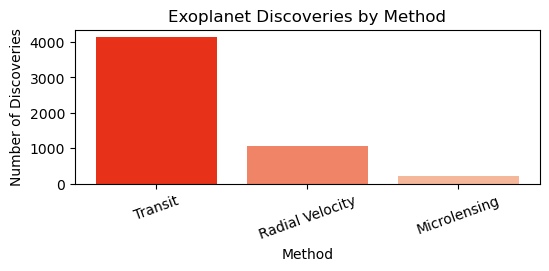

In [305]:
#| echo: False

def best_methods_graph():
    x = list(best_method.head(3).index)
    y = best_method.head(3)
    colors = [(0.9, 0.1, 0.0, 0.9), (0.9, 0.2, 0.0, 0.6),
              (0.9, 0.3, 0.0, 0.4), (0.9, 0.4, 0.0, 0.3), 
              (0.9, 0.5, 0.0, 0.2)]

    fig, ax = plt.subplots(figsize=(6, 2))
    ax.bar(x, y, color=colors)
    plt.xlabel('Method')
    plt.ylabel('Number of Discoveries')
    plt.title('Exoplanet Discoveries by Method')
    plt.xticks(rotation=20)

    plt.savefig('methods-plot')
    plt.show()


best_methods_graph()

Well now that we know what methods will aid us in our quest for habitable exoplanets, lets take a look at what technologies have been most successful at employing these methods...

In [306]:
#| echo: False

group_by_instrument = data.groupby('disc_instrument').count()
most_successful_instrument = group_by_instrument.sort_values('pl_name', ascending=False)['pl_name']
# most_successful_instrument.head(5)

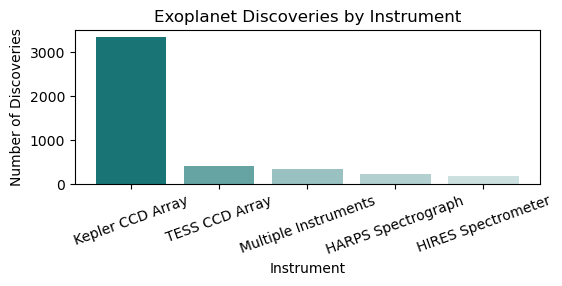

In [307]:
#| echo: False

def discoveries_per_instrument():
    x = list(most_successful_instrument.head(5).index)
    y = most_successful_instrument.head(5)
    colors = [(0.0, 0.4, 0.4, 0.9), (0.0, 0.4, 0.4, 0.6),
              (0.0, 0.4, 0.4, 0.4), (0.0, 0.4, 0.4, 0.3), 
               (0.0, 0.4, 0.4, 0.2)]

    fig, ax = plt.subplots(figsize=(6, 2))
    ax.bar(x, y, color=colors)
    plt.xlabel('Instrument')
    plt.ylabel('Number of Discoveries')
    plt.title('Exoplanet Discoveries by Instrument')
    plt.xticks(rotation=20)

    plt.savefig('discoveries-plot')
    plt.show()

discoveries_per_instrument()

It's clear from this chart that NASA's Kepler spacecraft is high and above the breadwinner when it comes to exoplanet discoveries. Given what we've already established, it won't surprise you to learn that Kepler's primary method of exoplanet detection is the transit method. While none of the other instruments come close to Kepler's numbers, it is worth noting that the top two (NASA's TESS being the second) are both spacecraft. Now we not only have a good idea of what methods are most prolific, but also what technologies we should invest in to best carry out these methods.

Happily, the smart people at NASA, ESA, and other space agencies know this and are making preciesely those investments. This raises the question: how many exoplanets can we expect to discover down the line? Let's exclude the possiblity that we may invent new methods which could greatly increase the rate and scope of exoplanet discovery, and base our prediction on the current rates of discovery.

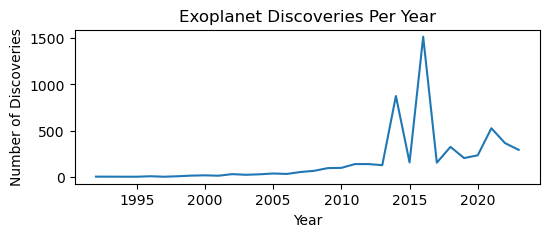

In [308]:
#| echo: False

discoveries_per_year = data.groupby('disc_year').count()

def discoveries_per_year_plot():
    plt.figure(figsize=(6, 2))
    plt.plot(discoveries_per_year['pl_name'])
    plt.xlabel('Year')
    plt.ylabel('Number of Discoveries')
    plt.title('Exoplanet Discoveries Per Year')
    plt.savefig('discoveries-per-year')

    plt.show()

discoveries_per_year_plot()

Here we can see the trend of exoplanet discoveries over the last few decades. At first glance you might think this looks far too chaotic to give us a nice extrapolation into the future. But if we look closer, we can see that the offending irregularities are really just two major spikes in the years 2014 and 2016.

In [309]:
#| echo: False

biggest_year = discoveries_per_year.sort_values('pl_name', ascending=False)['pl_name']    
# biggest_year.head(5)

 Why might that be? An obvious guess might be that these could be years when a new space telescope was launched. However, Kepler was launched in 2009 and TESS was not until 2018. We know from previous analysis that Kepler is the only instrument with enough discoveries under its belt to cause spikes of this size, but perhaps its data was being released in waves and that is messing with our rate of discovery. Let's take another look, isolating Kepler this time...

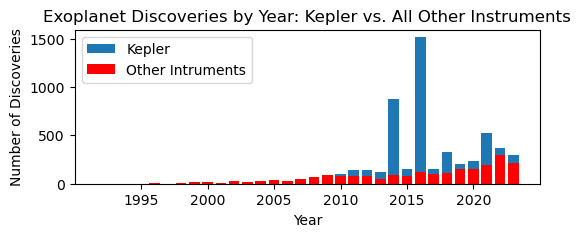

In [310]:
#| echo: False

not_kepler_filter = data['disc_instrument'] != 'Kepler CCD Array'
not_kepler_disc_per_year = data[not_kepler_filter].groupby('disc_year').count()['pl_name']

def kepler():

    x1 = list(discoveries_per_year['pl_name'].index)
    y1 = discoveries_per_year['pl_name']

    x2 = list(not_kepler_disc_per_year.index)
    y2 = not_kepler_disc_per_year

    fig, ax = plt.subplots(figsize=(6, 2))
    ax.bar(x1, y1)
    ax.bar(x2, y2, color='red')
    plt.xlabel('Year')
    plt.ylabel('Number of Discoveries')
    plt.title('Exoplanet Discoveries by Year: Kepler vs. All Other Instruments')
    plt.legend(['Kepler', 'Other Intruments'])

    plt.savefig('kepler-vs-others')
    plt.show()

kepler()

It is clear from this chart (which shows Kepler's discoveries stacked *on top* of those of all the other instruments) that Kepler is indeed reponsible for the spikes, and that, despite being operational for almost 10 years, nearly all of its discoveries are clumped into only 2 years. We are forced to conclude that the release of Kepler's discoveries and the actual date those discoveries were made are treated as the same by this databse, even when they almost surely are not. This hypothesis is supported by the fact that the data show Kepler making discoveries up until the present, when in reality it was retired in 2018. Since these artifical dates are unhelpful to the predictions we are trying to make, let's disregard Kepler's data for now. The resulting graph looks like this:

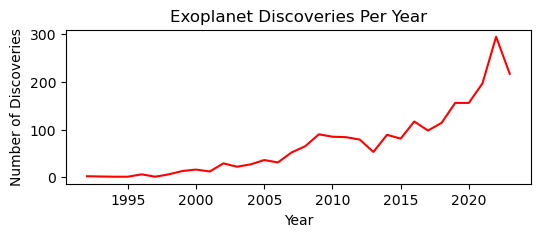

In [311]:
#| echo: False

def not_kepler_plot():
    plt.figure(figsize=(6, 2))
    plt.plot(not_kepler_disc_per_year, color='red')
    
    plt.xlabel('Year')
    plt.ylabel('Number of Discoveries')
    plt.title('Exoplanet Discoveries Per Year')
    plt.savefig('discoveries-per-year-no-kep')

    plt.show()

not_kepler_plot()

That's certainly an improvement! Now let's extrapolate this into the future. How many exoplanets will we discover 5 years from now? What about 10? 50? 100?

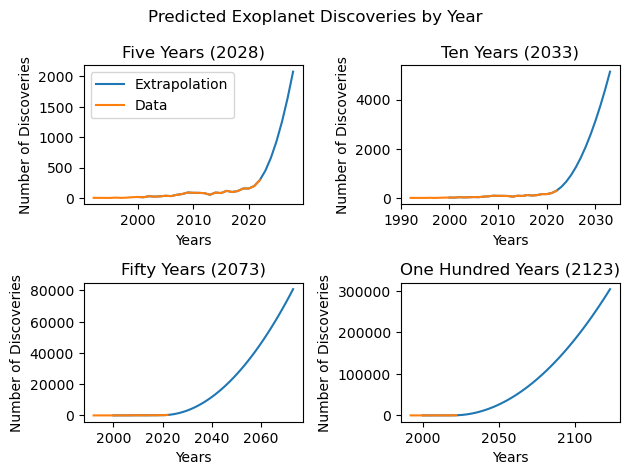

In [312]:
#| echo: False

def extrapolate():

    x = list(not_kepler_disc_per_year.index)[:-1]
    y = list(not_kepler_disc_per_year)[:-1]
    func = interp1d(x, y, axis=0, bounds_error=False, kind='quadratic', fill_value='extrapolate')

    fig, axs = plt.subplots(2, 2)
    fig.suptitle('Predicted Exoplanet Discoveries by Year')

    x5 = list(range(2000, 2029))
    y5 = func(x5)

    axs[0, 0].plot(x5, y5)
    axs[0, 0].plot(x, y)
    axs[0, 0].set_title('Five Years (2028)')
    axs[0, 0].legend(['Extrapolation', 'Data'])

    x10 = list(range(2000, 2034))
    y10 = func(x10)
    axs[0, 1].plot(x10, y10)
    axs[0, 1].plot(x, y)
    axs[0, 1].set_title('Ten Years (2033)')


    x50 = list(range(2000, 2074))
    y50 = func(x50)
    axs[1, 0].plot(x50, y50)
    axs[1, 0].plot(x, y)
    axs[1, 0].set_title('Fifty Years (2073)')

    x100 = list(range(2000, 2124))
    y100 = func(x100)
    axs[1, 1].plot(x100, y100)
    axs[1, 1].plot(x, y)
    axs[1, 1].set_title('One Hundred Years (2123)')

    for ax in axs.flat:
        ax.set(xlabel='Years', ylabel='Number of Discoveries')
    fig.tight_layout()

    plt.savefig('predicted-discoveries')
    plt.show()

extrapolate()

While these graphs are far from a complete predictive model, they serve as nice illustrations for what the future of exoplanet discovery may look like. As long as funding continues, the future of exoplanet exploration appears to be bright. And that's a very good thing, as we will need to assess as many planets as possible in our search for alien life and in order to have chance at finding an Earthlike world.

Both of the main questions we are investigating are best answered in part by searching for planets we deem habitable for life. This search requires us to define criteria for what conditions we beleive are necessary for a planet to give rise to and sustain life. These criteria are of course based entirely on Earth life, as it is the only kind of life we know of. And while it is easy to imagine that alien life may have rather different attributes and therefore require rather different conditions, we have to narrow our search somehow. So looking for framiliar kinds of life seems like a practical place to start.

The first thing we will be checking is the planets' **density**. This is important because not every planet has a terrestrial surface. Massive gaseous worlds called gas giants (like Jupiter and Saturn) and ice giants (like Uranus and Neptune) consist entirely of vast swirling cloudscapes and possible liquid metal cores. These are certainly no place for humans to settle and not a compelling candidate for housing even the strangest imaginable alien life. These worlds are characterized by their low density, while terrestrial planets (planets with rocky surfaces like Mercury, Venus, Earth, and Mars) have a higher density. While density is not included in the data table, we can easily calculate it with what data we do have. The formula for density ($D$) is:
$$ D= {m \over V} $$
Where $m$ is the planets **mass** and $V$ is its **volume**. However, we don't have volume either. Luckily, thanks to the pulling and squeezing of gravity, all planets are the same shape: a sphere (in fact, having accumalated enough mass to compact yourself into a sphere is one of the criteria for being classified as a planet!). So we need only apply the equation for the volume of a sphere:
$$ V = {4 \over 3} \pi r^3 $$
Each exoplanet's radius is stored in the database with the units "Earth Radius". That means we are measuring the exoplanets' radii by how many Earth radii they contain. That is going to make our units pretty clunky when we get to the density calculation so let's convert that to the SI units for distance, meters. To do this, we can just take the radius of the exoplanet (let's call that $r_p$) in Earth radii and multiply it by the radius of Earth (let's call that $r_E$) in meters (6378 km).
$$ r_pr_E $$
$$ r_E = 6378\ km $$
When we get to the density calculation, we will arrive at a similar problem with the exoplanet's mass. This is measured in "Earth Mass" in the database, but we will just apply the same fix as above, taking the exoplanet's mass as $m_p$ and Earth's mass as $m_E$:
$$ m_pm_E $$
$$ m_E = 5.9722 \times 10^{24}kg $$
So to recap, we are calculating exoplanet densities, and in order to do that we must calculate their volumes, and in order to do that we must convert their radii to SI units. I will be writing a function to do this, but it can be represented mathematically by the following equation:
$$ D = {m_pm_E \over {4 \over 3} \pi (r_pr_E)^3} $$

In [313]:
#| echo: False

Me = 5.9722*10**24
re = 6371000

notna_filter = data['pl_rade'].notna()


def r_in_meters():
    # Create new column for radius in meters...
    data['pl_r_meters'] = (data['pl_rade']*re)
    return data[notna_filter]['pl_r_meters']

def m_in_kg():
    # Create new column for mass in kilograms...
    data['pl_mass_kg'] = (data['pl_bmasse']*Me)
    return data[notna_filter]['pl_mass_kg']


def volume():
    r_in_meters()

    # Create new column for volume...
    data['pl_vol'] = 4/3*3.14*(data['pl_r_meters'])**3
    return data[notna_filter]['pl_vol']


def density():
    m_in_kg()
    volume()

    # Create new column for mean desnity...
    data['pl_density'] = data['pl_mass_kg']/data['pl_vol']
    return data[notna_filter]['pl_density']

# density().head(5)

We can check our volume and density calculations by testing them out on Earth.

In [314]:
#| echo: False

Ve = 4/3*3.14*(re)**3
print("Earth's volume in m^3:", Ve)
print("Earth's density in kg/m^3:", Me/Ve)

Earth's volume in m^3: 1.0826577771020533e+21
Earth's density in kg/m^3: 5516.239874049369


According to NASA, Earth has a volume of $1.083 \times 10^{21}\  m^3$ and a density of $5514\ kg/m^3$, both of which agree with our calculations.

Now we have the densities of each exoplanet (excluding those whose radius or mass were not available) in units of kilograms per cubic meter (kg/m^3^). To define our cut-off for what density should be the minimum for a habitable world, we must again refer to the only celestial bodies that we can study thoroughly. In our solar system, the least dense terrestrial planet is Mars at 3934 kg/m^3^, while the densest gas giant is Neptune at 1638 kg/m^3^. So we know our cut-off should be somewhere between the two, but that's a wide margin. For a larger sample size, there are plenty of terrestrial moons in the solar system that we can draw from. Our own moon has a mean density of 3340 kg/m^3^ with the least dense being Jupiter's moon Europa at 3000 kg/m^3^. It seems reasonable to take the desnity of the least dense terrestrial object as our cut-off rather than the densest non-terrestrial object, since we are certainly looking for worlds that are much more like Europa than Jupiter.

In [315]:
#| echo: False

before = len(density())

def density_cutoff():
    density()
    filtered = data['pl_density'] >= 3000
    return data[filtered]

after = len(density_cutoff())

density_cutoff()['pl_density'].head()

7      3403.111841
13    30498.945485
14     5795.107797
30     6297.248301
48     4883.107002
Name: pl_density, dtype: float64

In [316]:
#| echo: False

print('Number of exoplanets with calcuable densities:', before)
print('Number of exoplanets with densities meeting our criteria:', after)
print('The difference:', before-after)

Number of exoplanets with calcuable densities: 4217
Number of exoplanets with densities meeting our criteria: 495
The difference: 3722


Well, our search for a habitable world has narrowed things down quite a bit. We've gone from 4217 potential worlds (taking only those who had enough data to do the density calculation), to only 495. That's a lot of low-desnity worlds (3722 to be exact)! Why might there appear to be so many more gas giants than terrestrial planets in the universe, when in our own solar system the two are equally common? Well, it's possible we are an unusal kind of solar system, but that's probably not what's going on here. It seems more likely that we are just finding more gas giant exoplanets by virtue of their size. They tend to have far more mass than terrestrial worlds, making them easily detectable by the radial velocity method, and far more volume, making them easily detectable to the transiting and microlensing methods.

Next, we will examine what is widley considered to be the most important cirterium in the search for life on other planets: distance from the host star. There are many different kinds of stars all with different sizes and spectra. The farther away from its host star a planet is, the weaker the starlight reaching that planet will be. Too close to the sun, and you get a hot, bright world where water evaporates and any atmosphere would be stripped away by solar radiation. Too far, and you get a cold, dark world where any water would be bound up in solid ice, unavailable to parttake in fostering the chemsitry of life. If a planet orbits a star at just the right distance, such that liquid water can exist on its surface, then that planet is said to occupy the **habitable zone** (also charmingly referred to as the **Goldilocks zone**) of its star.

To calculate the boundaries of a star's habitable zone, we need only know its luminosity ($L_{star}$). This value can be calculated using a number of finely measured properties and running them through a series of equations, but thankfully for us, the NASA Exoplanet Archive has a column for the luminosity of an exoplanet's host star. We will use the following equations:
$$ r_i = \sqrt{L_{star} \over 1.1}\ \ \ \ \ \ \ \ \ \ \ r_o = \sqrt{L_{star} \over 0.53}$$
Where $r_i$ is the inner radius or minumum habitable distance from the host star, and $r_o$ is the outer radius or the greatest habitable distance from the host star. Any planet likely to be good a candidate for life or appropriate for human settlement will fall within $r_i$ and $r_o$. The values in the denomenators of these equations are constants based on our own solar system. As such, the output of the equations will be in Astronomical Units (AU). An AU is equal to the distance of Earth from the Sun:
$$ 1\ AU = 1.496 \times 10^{11} meters $$
Let's calculate the boundaries of the habitable zone for each of these distant solar systems.

In [317]:
#| echo: False

def habitable_boundaries():
    filtered = data['st_lum'].notna()

    # Create new column for surface gravity...
    data['inner_rad'] = np.sqrt((np.absolute(data['st_lum']))/1.1)

    # Create new column for surface gravity...
    data['outer_rad'] = np.sqrt((np.absolute(data['st_lum']))/0.53)

    return data[filtered]

habitable_boundaries()[['inner_rad', 'outer_rad']].head(5)

,inner_rad,outer_rad
0,1.427967,2.057201
2,1.293340,1.863249
3,0.372949,0.537289
4,0.296954,0.427807
5,1.431465,2.062239


Now that we have the boundaries of the habitable zone calculated, let's see which exoplanets lie within their host stars' habitable zones.

In [318]:
#| echo: False

before = len(habitable_boundaries())
def goldilocks_filter():
    df = habitable_boundaries()
    filtered = (df['pl_orbsmax'] >= df['inner_rad']) & (df['pl_orbsmax'] <= df['outer_rad'])
    return df[filtered]

after = len(goldilocks_filter())

#goldilocks_filter().head()

In [319]:
#| echo: False

print('Number of stars with calcuable habitable zones:', before)
print('Number of exoplanets within the habitable zone:', after)
print('The difference:', before-after)

Number of stars with calcuable habitable zones: 4033
Number of exoplanets within the habitable zone: 176
The difference: 3857


As we can see, residing within the habitable zone is a fairly rare property for a planet to have (only 176 planets in the archive got through this filter). It's again worth noting that one thing skewing this result may be that it is easier to find gas giant exoplanets, which tend to be further from their star, outside of the habitable zone. However, we can't count on planets we can't see, so our search for a habitable world grows narrower.

In [320]:
#| echo: False

habitable_filter = (data['pl_orbsmax'] >= data['inner_rad']) & (data['pl_orbsmax'] <= data['outer_rad']) & (data['pl_density'] >= 3000)

possible_homes = data[habitable_filter]

possible_homes.head(10)

,pl_name,loc_rowid,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,...,st_logglim,sy_dist,sy_disterr1,sy_disterr2,pl_mass_kg,pl_r_meters,pl_vol,pl_density,inner_rad,outer_rad
57,BD+20 594 b,184,BD+20 594,1,1,0,0,Transit,2016,K2,...,0.0,179.461,1.2570,-1.2400,9.734686e+25,15003705.0,1.414047e+22,6884.271875,0.225630,0.325054
1954,Kepler-10 c,5979,Kepler-10,1,3,0,0,Transit,2011,Kepler,...,0.0,185.506,0.8110,-0.8050,1.027218e+26,14780720.0,1.351933e+22,7598.146019,0.223607,0.322139
2104,Kepler-11 g,7485,Kepler-11,1,6,0,0,Transit,2010,Kepler,...,0.0,646.346,6.3750,-6.3750,1.500814e+26,21533980.0,4.180626e+22,3589.926286,0.330289,0.475831
2381,Kepler-131 c,10176,Kepler-131,1,2,0,0,Transit,2014,Kepler,...,0.0,228.678,1.4310,-1.4130,4.927065e+25,5033090.0,5.337925e+20,92303.000292,0.141421,0.203739
2851,Kepler-1656 b,14328,Kepler-1656,1,2,0,0,Transit,2018,Kepler,...,0.0,185.875,0.8350,-0.8270,2.902489e+26,28478370.0,9.669717e+22,3001.627828,0.138170,0.199054
3989,Kepler-47 b,25266,Kepler-47,2,3,0,1,Transit,2012,Kepler,...,0.0,1025.020,30.6445,-30.6445,3.798319e+27,19304130.0,3.011751e+22,126116.634664,0.262851,0.378677
4076,Kepler-53 c,26130,Kepler-53,1,3,0,0,Transit,2012,Kepler,...,0.0,1366.070,65.8100,-60.1300,2.149992e+26,22744470.0,4.926016e+22,4364.565301,0.180907,0.260623
4946,TIC 279401253 b,33004,TIC 279401253,1,2,0,0,Transit,2023,Transiting Exoplanet Survey Satellite (TESS),...,0.0,285.584,2.7900,-2.7380,1.165455e+28,71412539.0,1.524726e+24,7643.699732,0.296954,0.427807
5091,TOI-2180 b,33316,TOI-2180,1,1,0,0,Transit,2022,Transiting Exoplanet Survey Satellite (TESS),...,0.0,116.685,0.2670,-0.2660,5.229361e+27,72126091.0,1.570889e+24,3328.917910,0.607529,0.875236


In fact, filtering by our criteria for both density and distance from host star, we are left with only 9 candidates. Let's order them by distance and see which would be easiest for us to explore closer.

In [321]:
#| echo: False

possible_homes.sort_values(['sy_dist']).head(1)

,pl_name,loc_rowid,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,...,st_logglim,sy_dist,sy_disterr1,sy_disterr2,pl_mass_kg,pl_r_meters,pl_vol,pl_density,inner_rad,outer_rad
5091,TOI-2180 b,33316,TOI-2180,1,1,0,0,Transit,2022,Transiting Exoplanet Survey Satellite (TESS),...,0.0,116.685,0.267,-0.266,5.229361e+27,72126091.0,1.570889e+24,3328.91791,0.607529,0.875236


It seems our nearest possibly habitable neighbor is TOI-2180 b! Though 116.685 parsecs away is nobody's idea of close. It's appraoximately 3 quadrillion kilometers away! At this point, our efforts to find life or sanctuary on other worlds may seem hopeless. But really this result is better evidence of the crudeness of our approach...

## Discussion

For one, we used density to characterize whether or not a planet was a gaseous or terrestrial. This is not an ill-informed strategy, but it is definitely imperfect. Additionally, both the atmosphere and magnetic field of a planet can stretch the habitable zone by trapping heat (via the greenhouse effect) and shielding off cosmic radiation, respecitvely. Neither are easily detectable given our currrent methods of exoplanet discovery. It is also worth reiterating that it is very likely alien life will not obey our conventional notions of what life is like and where it can survive. On top of all of that, we did not consider our own solar system in this analysis (of course, they are by definition not exoplanets) and many of the most promising candidates for life beyond Earth exist right in our cosmic backyard, on the moons and planets oribting our local star! The search for habitable worlds is only in its infancy. There are countless exoplanets yet to be discovered, and many new amazing things to learn along the way. The answers to some of the most profound questions we can ask, are waiting for us out there, in the vastness of space, speckeled with exoplanets swirling about in their star systems.

## References

#### Dataset:
NASA Exoplanet Science Institute. (2023). *NASA Exoplanet Archive*[Dataset]. National Aeronautics and Space Administration. https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS

#### Other Information Provided by:

NASA Science. (2018). *Kepler/ K2*. National Aeronautics and Space Administration. https://science.nasa.gov/mission/kepler/

NASA Space Science Data Coordinated Archive. (2023). *Earth Fact Sheet*. National Aeronautics and Space Administration. https://nssdc.gsfc.nasa.gov/planetary/factsheet/earthfact.html

NASA Space Science Data Coordinated Archive. (2023). *Planetary Fact Sheet*. National Aeronautics and Space Administration. https://nssdc.gsfc.nasa.gov/planetary/factsheet/

Planetary Biology. (2023). *Calculating the Habitable Zone*. https://www.planetarybiology.com/calculating_habitable_zone.html

